# Entrepreneurship Ecosystems and Policy

### Mary Boardman, Shirley Deng, John Pette

# Introduction

The purpose of this project is to explore the relationship, if any, between policy and the health of an entrepreneurial ecosystem. 

Entrepreneurship fuels the engine of economic growth and development. Entrepreneurs and the businesses they create drive innovation, productivity, and job growth. Through mutually beneficial exchanges and innovation, productive entrepreneurs solve problems in a way that creates both wealth and social value.

However, in order for productive entrepreneurship to thrive, it must do so in an environment that enables this. Not only does the environment need to enable entrepreneurs to start businesses, but it needs to enable them to grow, and profit from activities that benefit the ecosystem within which it exists. Essentially, a productive enterprise must exist in symbiosis with its ecosystem for this to truly drive development. 

The entrepreneurial ecosystem does not just include geography, but also the local, national, even international context. Specifically, according to the Global Entrepreneurship and Development Institute (GEDI), the entrepreneurial ecosystem consists of the mix of attitudes, resources, and infrastructure. To measure this, GEDI produces the annual Global Entrepreneurship Index (GEI Score), which measures the health of this ecosystem for 137 countries. Using this index, it then ranks the countries to provide a picture of how each country performs in relation to the others. 

As with any complex phenomenon, many factors could impact the health of the entrepreneurial ecosystem. For example, GEDI uses 14 pillars to determine this. However, given the time and scope constraints within this project, we are only focusing on two general factors. 

Specifically, we focus on the policy environment and culture. While not easy or straightforward to change, policy is easier and more straightforward to change than culture. In fact, if, holding culture constant, it is policy that primarily affects the entrepreneurship ecosystem, this research could present both interesting and actionable policy insights. 

# Research Question

To explore this issue, we address the following research question: 

Do variations in governance explain variations in the health of a country's entrepreneuial ecosystem, holding cultural attitudes and values constant? 

# Overview of Data Sets

To address this question, we incorporated data from three data sets. First, we used the GEI scores. As these measure the quality of an entrepreneurial ecosystem, these scores constitute our dependent variable. 

We drew our independent variables from two primary data sets: Global Entrepreneurship Monitor (GEM) and World Values Survey (WVS). The GEM measures entrepreneurial attitudes and the national context (including policy and governance) for entrepreneurs. As a complement, the WVS measures beliefs, values, and attitudes of people around the world. Data from this source can provide the cultural context within which entrepreneurs do business (or not do business). 

We used 2014 data only. Both the GEM and the WVS survey release new rounds/waves every few years. As of April 2018, the most recent data from the GEM is from 2014, and the most recent data from WVS is from Wave 6, conducted between 2010-2014. While there is longitudinal data available, a time series data analysis is outside the scope of this project and is best left for future research.  

## Global Entrepreneurship Index (GEI Score)

GEDI collects data on entrepreneurial attitudes, abilities, and aspirations. It weights these against the broader social and economic infrastructure. GEDI uses this data to create 14 pillars to measure the health of the entrepreneurial ecosystem. 

The GEDI source data can be found at: http://thegedi.org/downloads/ 

## Global Entrepreneurship Monitor (GEM)

The Global Entrepreneurship Monitor, produced by the GEM consortium (a joint project between Babson College and the London Buiness School) is the most robust and reliable study of entrepreneurship. GEM has been in existence since 1999. They conduct over 200,000 interviews every year, spanning over 100 economies. 

Specifically, the GEM data measures entrepreneurs' behavior and attitudes, along with the relevant national context. 

Our team selected the following variables from this data set for potential analysis. We will be holding the cultural variables constant, and the three policy/governance variables are our independent variables of interest:

Cultural Variables (independent variables to be held constant in our model):

-Fear of Failure Rate

-Entrepreneurship as Desirable Career Choice

-High Status Successful Entrepreneurship 

-Media Attention for Entrepreneurship 

-Cultural and social norms

Policy/Governance Variables (independent variables of interest):

-Governmental support and policies

-Taxes and bureaucracy

-Governmental programs

The GEM source data can be found at: http://www.gemconsortium.org/data/key-nes 

## World Values Survey (WVS)

The World Values Survey consists of an international team of scholars who conduct the largest international, non-commercial, survey research project of human beliefs and values over time. It includes nearly 100 countries, spanning the very poor to the very rich, and has been in existence since 1981. We selected survey questions from this data set to measure the cultural context within which entrepreneurs operate. 

Our team selected the following survey questions from this data set for potential analysis. While they all measure cultural attitudes, we are focused specifically on those that measure locus of control. The reason we selected these specifically is because the GEM data does not measure this. Locus of control might be important for potential entrepreneurs, as an internal locus of control translates to a person's feeling that their actions can drive real change. It is a similar concept to personal empowerment. 

Locus of control source survey questions:

-v55: Some people feel they have completely free choice and control over their lives, while other people
feel that what they do has no real effect on what happens to them. Please use this scale where 1
means "no choice at all" and 10 means "a great deal of choice" to indicate how much freedom of
choice and control you feel you have over the way your life turns out.

-v100: How would you place your views on this scale (from 1-10)?: In the long run, hard work usually brings a better life--Hard work doesn’t generally bring success—it’s more a matter of luck and connections.

WVS source data can be found at: http://www.worldvaluessurvey.org/WVSDocumentationWV6.jsp

# Data Cleansing and Discussion

### Joining the Data
Fortunately, all of our data sets contain country-level data and therefore share a column. Because of this, joining the data sets (below) was relatively straightforward. However, not all countries were covered in all of the data sets. Therefore, we excluded countries with missing data from the analysis. 30 countries contained data in both the GEM and WVS data sets. We performed an inner join between 2014 data from GEM and WVS in order to obtain the isolated data. We do acknowledge that excluding countries with missing data could reduce the explanatory power in our model, and would hesitate to make inferences about countries not included in the analysis. Because there are at least 30 countries that were included, though, basic hypothesis testing and regression analysis is still a viable option for further research at this point.

### Cleaning the Data

As with the join, this was relatively straightforward. Both the GEM and the WVS are well-established, very clean data sets. Our sanity check of the data found no glaring inconsistencies. 

While most of the headers are self explanatory, the WVS ones are not. Therefore, we changed these headers to the following: 

WVS V100, or "How would you place your views on this scale (from 1-10)?: In the long run, hard work usually brings a better life--Hard work doesn’t generally bring success—it’s more a matter of luck and connections" was changed to "Importance of Luck".

WVS V55, or "Some people feel they have completely free choice and control over their lives, while other people
feel that what they do has no real effect on what happens to them. Please use this scale where 1
means "no choice at all" and 10 means "a great deal of choice" to indicate how much freedom of
choice and control you feel you have over the way your life turns out." was changed to "Internal Locus of Control".

We also added underscores to the column names with spaces, to make them easier to work with in Pandas. 

In [12]:
%matplotlib inline
import sys
import numpy as np
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [8]:
df = pd.read_csv("GEM_GEDI_WVS_2001_2014.csv", encoding = "ISO-8859-1")

pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 999)
pd.set_option('precision', 5)

df = df[df['Year'] == 2014]

df_GEM = df[['Economy', 'GEDI Score', 'Fear of Failure Rate ',
          'Entrepreneurship as Desirable Career Choice',
          'High Status Successful Entrepreneurship ', 'Media Attention for Entrepreneurship ',
          'Governmental support and policies', 'Taxes and bureaucracy',
          'Governmental programs', 'Cultural and social norms'
         ]]

df_WVS = df[['Economy', 'WVSV100', 'WVSV55'
         ]]

df_GEM = df_GEM.dropna(axis=0, how='any')
df_WVS = df_WVS.dropna(axis=0, how='any')

df_join = df_GEM.set_index('Economy').join(df_WVS.set_index('Economy'), how='inner')
df_join[['Taxes and bureaucracy','Governmental programs']] = df_join[['Taxes and bureaucracy','Governmental programs']].apply(pd.to_numeric)

In [29]:
cols = ['GEI_Score', 'Fear_Of_Failure_Rate', 'Entrepreneurship_As_Desirable_Career_Choice', 
        'High_Status_Successful_Entrepreneurship', 'Media_Attention_For_Entrepreneurship', 'Governmental_Support_And_Policies',
        'Taxes_And_Bureaucracy', 'Governmental_Programs', 'Cultural_And_Social_Norms', 'Importance_Of_Luck',
        'Internal_Locus_Of_Control'
       ]
df_join.columns = cols

In [30]:
df_join

,GEI_Score,Fear_Of_Failure_Rate,Entrepreneurship_As_Desirable_Career_Choice,High_Status_Successful_Entrepreneurship,Media_Attention_For_Entrepreneurship,Governmental_Support_And_Policies,Taxes_And_Bureaucracy,Governmental_Programs,Cultural_And_Social_Norms,Importance_Of_Luck,Internal_Locus_Of_Control
Economy,,,,,,,,,,,
Argentina,38.4,23.54,57.82,52.20,63.63,2.08,1.49,2.70,3.01,3.90000,7.19223
Australia,77.9,39.21,53.35,67.09,72.56,1.83,2.44,2.23,3.19,3.56195,7.68720
Chile,65.1,28.39,69.43,64.43,65.21,2.77,2.91,3.06,3.09,4.71200,7.11600
China,41.6,39.50,65.68,72.91,69.28,3.07,2.76,2.54,2.89,3.28478,6.63478
Colombia,49.8,30.70,70.45,67.13,74.42,2.75,2.41,2.95,2.97,4.73479,8.12963
Ecuador,29.3,30.67,66.43,67.13,82.89,2.98,2.19,2.66,2.99,3.63311,7.84692
Estonia,59.0,41.77,55.56,64.93,43.34,2.43,3.58,3.39,3.39,5.04827,6.21266
Germany,64.6,39.95,51.66,79.10,51.41,2.93,2.87,3.46,2.65,4.67791,6.92815
India,31.3,37.67,57.93,66.16,56.62,3.00,2.43,2.94,3.43,4.86970,5.24984


# Analysis

## Exploratory Data Analysis (EDA)

The below Exploratory Data Analysis (EDA) helped us understand our data more clearly, informing our analysis. 

### Univariate Analysis

First, below is a brief look at the summary statistics and histograms of all variables. The summary statistics show us the mean, median, minimum, maximum, standard deviation, and quartiles. In addition to this, the histograms provide a useful visual for assessing the shape of the data, and any issues including skew and severe deviations from normality. Using these together is helpful in alerting us to issues with the data prior.

From the summary statistics below, we can see some issues with skew (i.e. where the mean is either greater or less than the median). We can also see that there are no glaring issues with missing data or data that has unexpected values (such as a survey that uses a Likert scale from 1-10, then codes the data as a 99 for no answer).

In [11]:
df_join.describe() 

,GEI_Score,Fear_Of_Failure_Rate,Entrepreneurship_As_Desirable_Career_Choice,High_Status_Successful_Entrepreneurship,Media_Attention_For_Entrepreneurship,Governmental_Support_And_Policies,Taxes_And_Bureaucracy,Governmental_Programs,Cultural_And_Social_Norms,Importance_Of_Luck,Internal_Locus_Of_Control
count,30.00000,30.00000,30.00000,30.00000,30.00000,30.0000,30.00000,30.00000,30.00000,30.00000,30.00000
mean,49.30667,34.21300,64.00267,66.95633,66.51033,2.6740,2.53300,2.76367,2.97700,4.17698,7.13843
std,15.64445,8.32805,12.08719,9.69307,12.62891,0.4516,0.50122,0.39003,0.39176,0.66794,0.79416
min,28.50000,16.79000,30.98000,48.99000,43.34000,1.8100,1.49000,2.11000,2.06000,2.60961,5.24984
25%,38.25000,28.54250,53.52750,62.65500,56.85500,2.3750,2.20250,2.45000,2.76750,3.64711,6.69379
50%,45.70000,35.66000,65.20500,67.13000,67.44000,2.7000,2.43500,2.75000,2.99000,4.24844,7.27737
75%,63.20000,39.46750,73.63000,72.91750,76.52000,3.0150,2.84000,2.94750,3.18250,4.68095,7.67813
max,82.50000,54.51000,82.43000,87.06000,84.70000,3.4900,3.98000,3.68000,3.75000,5.48654,8.39950


For each histogram, we included the mean and standard deviation, as well as a best fit line. This is helpful to assess any approximation to normality, skewness, kurtosis, and any other apparent issues with the data. As it turns out, while we have a sufficiently large data set to conduct statistical hypothesis testing (in future research), we do not have a sufficiently large data set to see definitively, just from the histograms, if the data approximates normal.

Below is the histogram for GEI score and Fear of Failure Rate. GEI Score is a right-skewed histogram, (i.e. the mean GEI Score is larger than the median GEI Score). Fear of Failure Rate has only a slight right skew, and might approximate normal. 

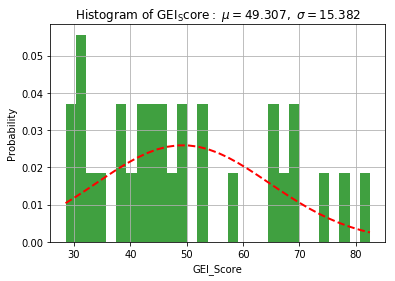

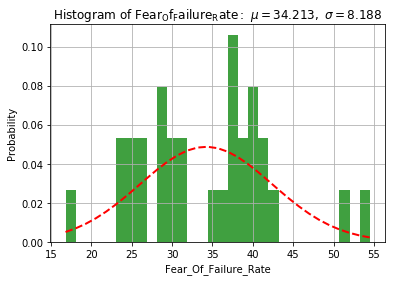

In [31]:
# Write a function to generate a histogram with a best fit line for each variable of interest

def hist_fittingline(data_column):
    
    # Find best fit
    (mu, sigma) = norm.fit(df_join[data_column])

    # Create histogram
    n, bins, patches = plt.hist(df_join[data_column], 30, normed=1, facecolor='green', alpha=0.75)

    # Add a 'best fit' line
    y = mlab.normpdf( bins, mu, sigma)
    l = plt.plot(bins, y, 'r--', linewidth=2)

    # Generate plot
    plt.xlabel(str(data_column))
    plt.ylabel('Probability')
    plt.title(r'$\mathrm{Histogram\ of\ ' + str(data_column) +':}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
    plt.grid(True)
    return plt.show()

hist_fittingline('GEI_Score')
hist_fittingline('Fear_Of_Failure_Rate')

As we can see below, Entrepreneurship as a Desirable Career Choice, as expected, is left-skewed (but does not approximate normal). Because entrepreneurship is seen as a desirable career choice here, we anticipated this to be reflected globally (shown as a left skew). However, while we expected this, it is still important to check this assumption. Then, High Status Successful Entrepreneurship does not have a heavy skew, and might approximate normal with a larger data set.

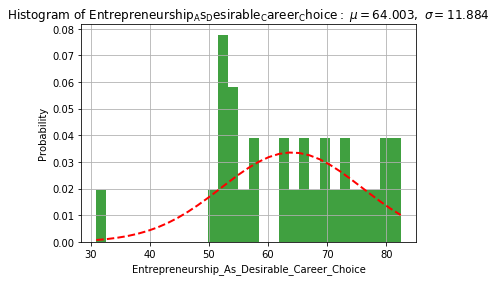

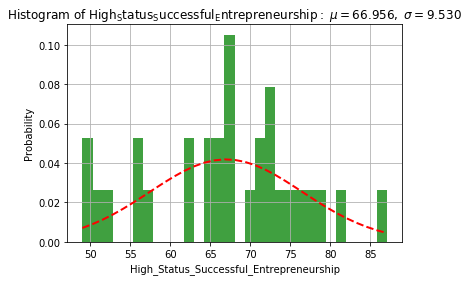

In [23]:
hist_fittingline('Entrepreneurship_As_Desirable_Career_Choice')
hist_fittingline('High_Status_Successful_Entrepreneurship')

Media Attention for Entrepreneurship, shown below, has a slight left skew. This is expected, as the achievements of high impact entrepreneurs is often newsworthy. This Governmental Support and Policies distribution does not appear to be very skewed. However, it also does not approximate normal.

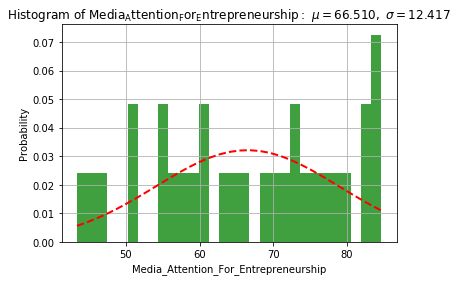

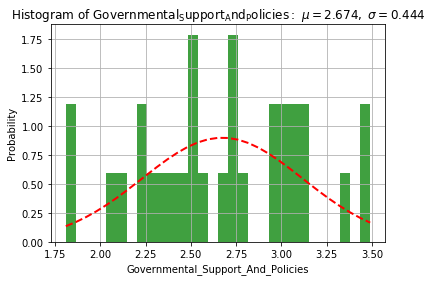

In [24]:
hist_fittingline('Media_Attention_For_Entrepreneurship')
hist_fittingline('Governmental_Support_And_Policies')

Taxes and Bureaucracy (below) appears to approximate normal more than the others, but does have a slight right skew. The Governmental Programs histogram (further below) shows a slight right skew, and does not approximate normal.

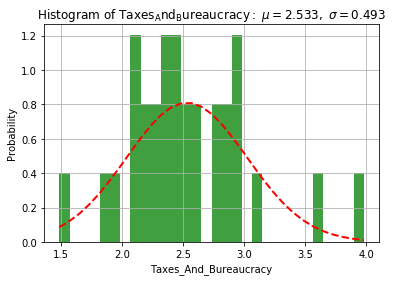

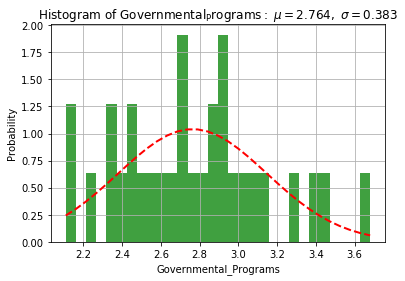

In [32]:
hist_fittingline('Taxes_And_Bureaucracy')
hist_fittingline('Governmental_Programs')

Cultural and Social Norms (below) has a very slight left skew, and might approximate normal. Then, Importance of Luck might approximate normal, and is slightly left skewed. Finally, Internal Locus of Control is a left-skewed distribution.

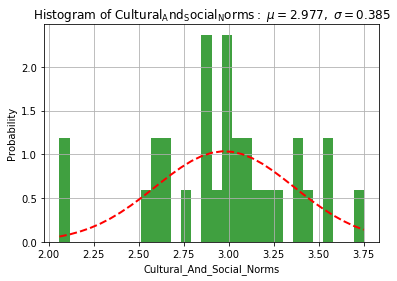

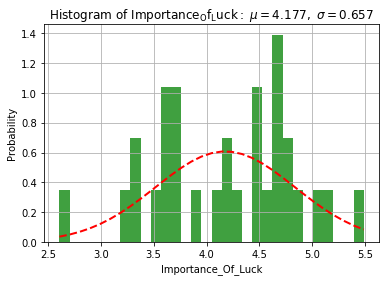

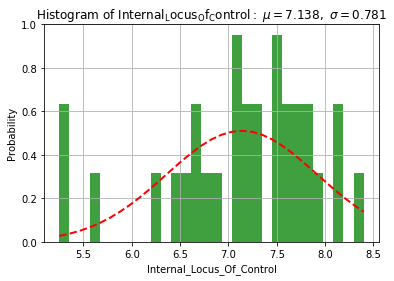

In [33]:
hist_fittingline('Cultural_And_Social_Norms')
hist_fittingline('Importance_Of_Luck')
hist_fittingline('Internal_Locus_Of_Control')

## Bivariate Analysis

Before building a model, it is important to visually inspect the data to see where relationships might lie, the direction of that relationship, and if any data transformations are necessary. In this section, we will use scatter plots, with regression lines superimposed, to clearly see relationships, if any, between key independent and dependent variables. This can give us an indication that no relationship is likely, that there needs to be some transformation (i.e. quadratic or log), and/or if there looks to be a nice, linear relationship between the variables. In addition to this, we use bar graphs, where helpful, to see if the variables appear to move together, and finally, a correlation heat map and matrix to see the actual correlations. 

In [34]:
def Regressionline(column_x, column_y):
    fig = plt.figure() # Create matplotlib figure
    x=df_join[column_x]
    y=df_join[column_y]
    fig, ax = plt.subplots()
    fit = np.polyfit(x, y, deg=1)
    ax.plot(x, fit[0] * x + fit[1], color='red')
    ax.scatter(x, y)
    plt.title("Regression between " + str(column_x)+ " and " + str(column_y))
    ax.set_xlabel(str(column_x))
    ax.set_ylabel(str(column_y))

    return fig.show()

The heatmap below helps us to visualize the correlation between each element on the matrix. The table below the heatmap provides with specific correlation scores. On the heatmap, we want to focus on the extreme light or extreme dark blocks as those suggest more positively or negatively related to each other. When we cross-reference the heatmap and the table, we will find the following significant relationships:

Internal Locus of Control is nagatively related to the Fear of Failure Rate, as shown by the correlation of -0.576. Governemental Programs is positively related to Tax and Bureaucracy, with a correlation of 0.687. Not surprisingly, Governmental Programs is also positively related to Governmental Support and Policies with a 0.539 correlation. Finally, both High Status Successful Entrepreneurship and Media Attention for Entrepreneurship are positively related to Entrepreneurship as a Desirable Career Choice, with correlations of 0.546 and 0.530 respectively. 

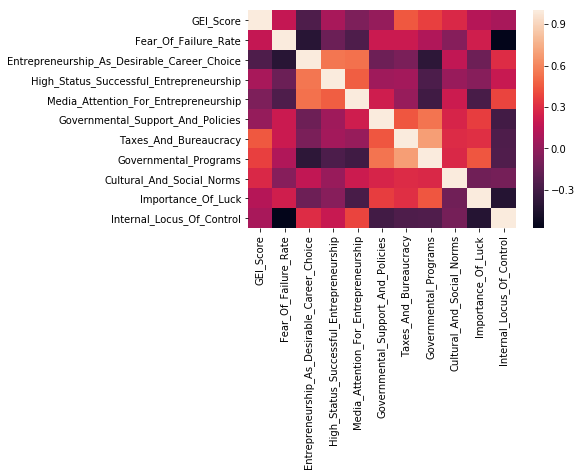

In [35]:
corr = df_join.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [36]:
df_join.corr()

,GEI_Score,Fear_Of_Failure_Rate,Entrepreneurship_As_Desirable_Career_Choice,High_Status_Successful_Entrepreneurship,Media_Attention_For_Entrepreneurship,Governmental_Support_And_Policies,Taxes_And_Bureaucracy,Governmental_Programs,Cultural_And_Social_Norms,Importance_Of_Luck,Internal_Locus_Of_Control
GEI_Score,1.00000,0.18696,-0.25218,0.07806,-0.07197,0.01424,0.44615,0.37173,0.28243,0.12735,0.07902
Fear_Of_Failure_Rate,0.18696,1.00000,-0.40786,-0.14261,-0.25520,0.20596,0.21137,0.10874,-0.04140,0.23608,-0.57616
Entrepreneurship_As_Desirable_Career_Choice,-0.25218,-0.40786,1.00000,0.54606,0.52987,-0.13806,-0.08509,-0.39047,0.17335,-0.13554,0.30043
High_Status_Successful_Entrepreneurship,0.07806,-0.14261,0.54606,1.00000,0.46962,0.04975,0.05895,-0.25804,0.02186,-0.03441,0.19368
Media_Attention_For_Entrepreneurship,-0.07197,-0.25520,0.52987,0.46962,1.00000,0.22675,0.01823,-0.30747,0.21506,-0.27753,0.38473
Governmental_Support_And_Policies,0.01424,0.20596,-0.13806,0.04975,0.22675,1.00000,0.44491,0.53868,0.26177,0.36211,-0.30144
Taxes_And_Bureaucracy,0.44615,0.21137,-0.08509,0.05895,0.01823,0.44491,1.00000,0.68747,0.29509,0.31458,-0.25577
Governmental_Programs,0.37173,0.10874,-0.39047,-0.25804,-0.30747,0.53868,0.68747,1.00000,0.28091,0.44587,-0.24423
Cultural_And_Social_Norms,0.28243,-0.04140,0.17335,0.02186,0.21506,0.26177,0.29509,0.28091,1.00000,-0.12500,-0.10380
Importance_Of_Luck,0.12735,0.23608,-0.13554,-0.03441,-0.27753,0.36211,0.31458,0.44587,-0.12500,1.00000,-0.41845


First, below, we have two visualizations of the relationship between GEI Score and Fear of Failure Rate: a scatterplot with regression line, and a bar chart. From both of these, there seems to be a slight positive relationship. This is surprising, as we expected a higher fear of failure to be more associated with a less healthy entrepreneurial ecosystem. 

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


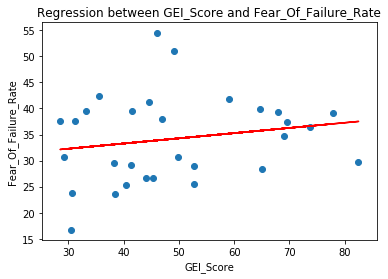

In [37]:
Regressionline('GEI_Score','Fear_Of_Failure_Rate')

Text(0.5,1,'GEI Score vs. Fear of Failure Rate')

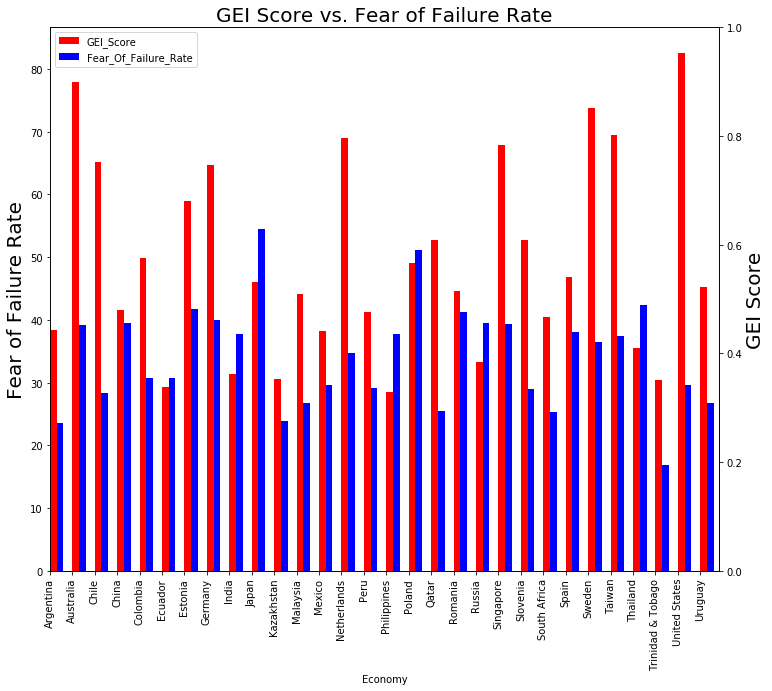

In [38]:
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() 
df_join.GEI_Score.plot(kind='bar',color='red',ax=ax,width=0.3,legend=True, position=0,figsize=((12,10)))
df_join.Fear_Of_Failure_Rate.plot(kind='bar',color='blue',ax=ax,width=0.3,legend=True, position=-1)
ax2.set_ylabel('GEI Score',fontsize=20)
ax.set_ylabel('Fear of Failure Rate',fontsize=20)
plt.title('GEI Score vs. Fear of Failure Rate', fontsize=20)

Below are two visualizations depicting a possible negative relationship between GEI Score and Entrepreneurship as a Desirable Career Choice. As with Fear of Failure Rate, this is surprising. We assumed that an environment conducive to entrepreneurship would be positively associated with it being a desirable career choice. 

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


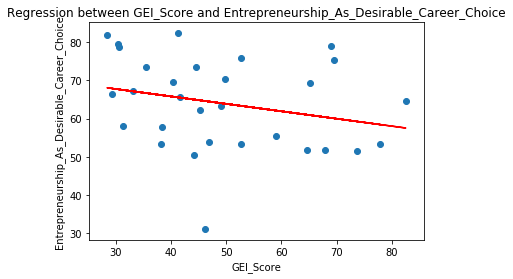

In [39]:
Regressionline('GEI_Score','Entrepreneurship_As_Desirable_Career_Choice')

Text(0.5,1,'GEI Score vs. Entrepreneurship as a Desirable Career Choice')

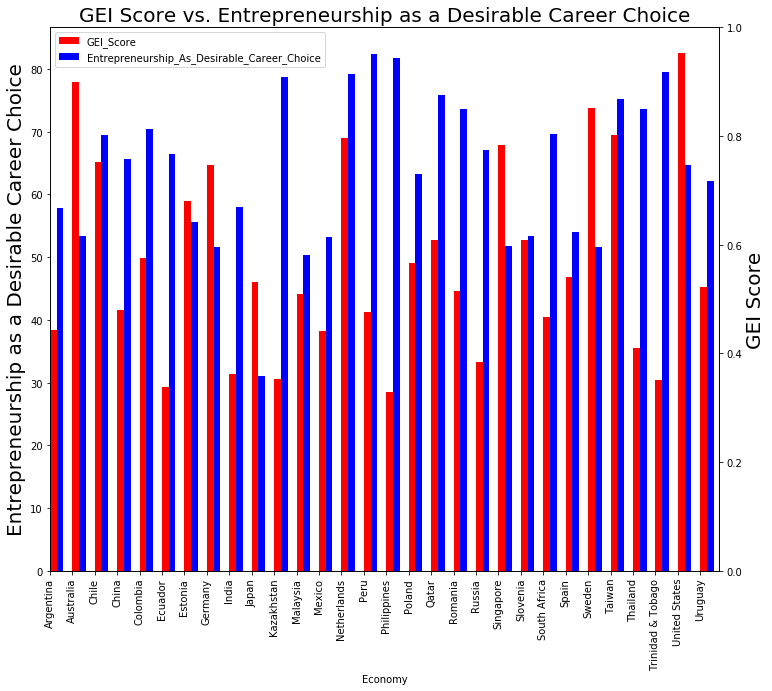

In [40]:
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() 
df_join.GEI_Score.plot(kind='bar',color='red',ax=ax,width=0.3,legend=True, position=0,figsize=((12,10)))
df_join.Entrepreneurship_As_Desirable_Career_Choice.plot(kind='bar',color='blue',ax=ax,width=0.3,legend=True, position=-1)
ax2.set_ylabel('GEI Score',fontsize=20)
ax.set_ylabel('Entrepreneurship as a Desirable Career Choice',fontsize=20)
plt.title('GEI Score vs. Entrepreneurship as a Desirable Career Choice', fontsize=20)

The regression line for High Status Successful Entrepreneurship and GEI Score is nearly flat, and the bar graph shows little relationship. This is surprising, as we expected a practically significant positive relationship. Even if there is a statistically significant relationship, it is not likely to be practically significant.

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


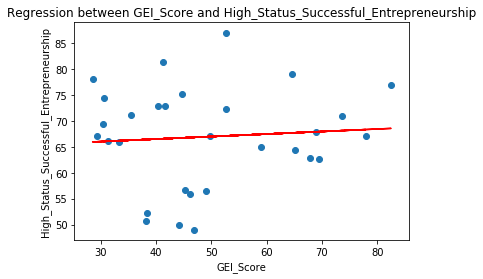

In [41]:
Regressionline('GEI_Score','High_Status_Successful_Entrepreneurship')

Text(0.5,1,'High Status Successful Entrepreneurship')

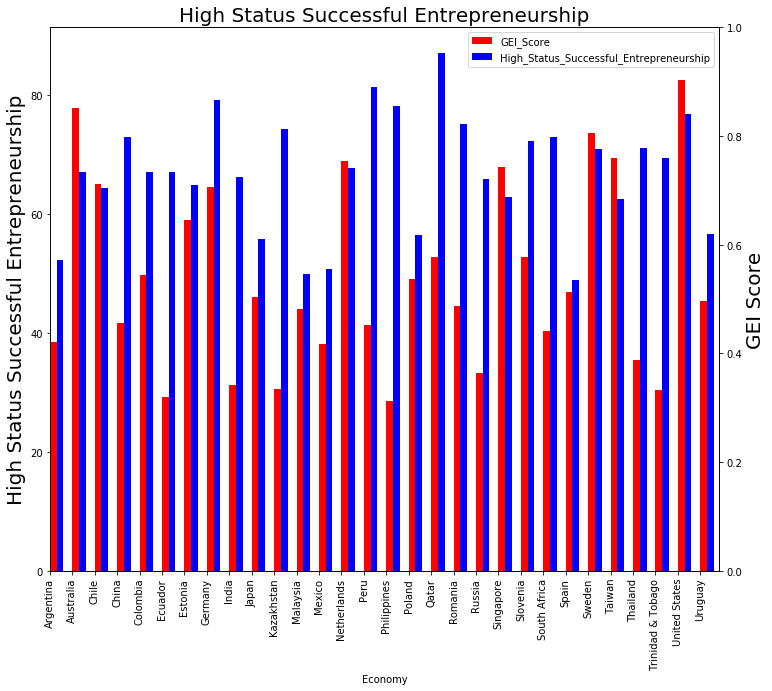

In [42]:
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() 
df_join.GEI_Score.plot(kind='bar',color='red',ax=ax,width=0.3,legend=True, position=0,figsize=((12,10)))
df_join.High_Status_Successful_Entrepreneurship.plot(kind='bar',color='blue',ax=ax,width=0.3,legend=True, position=-1)
ax2.set_ylabel('GEI Score',fontsize=20)
ax.set_ylabel('High Status Successful Entrepreneurship',fontsize=20)
plt.title('High Status Successful Entrepreneurship', fontsize=20)

From the following graphs, we can see a slight negative relationship between Media Attention for Entrepreneurship and GEI Score. While we anticipated there to be a positive relationship, this might be due to negative media attention entrepreneurs might receive. This warrants further research.

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


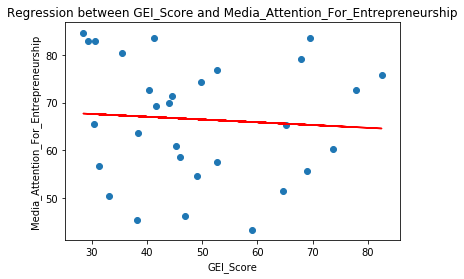

In [43]:
Regressionline('GEI_Score','Media_Attention_For_Entrepreneurship')

Text(0.5,1,'Media Attention For Entrepreneurship')

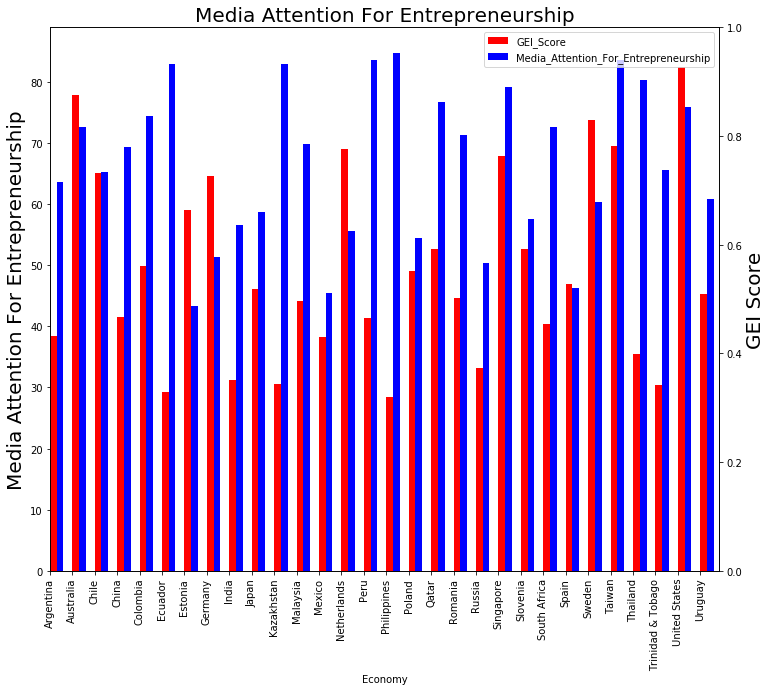

In [44]:
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() 
df_join.GEI_Score.plot(kind='bar',color='red',ax=ax,width=0.3,legend=True, position=0,figsize=((12,10)))
df_join.Media_Attention_For_Entrepreneurship.plot(kind='bar',color='blue',ax=ax,width=0.3,legend=True, position=-1)
ax2.set_ylabel('GEI Score',fontsize=20)
ax.set_ylabel('Media Attention For Entrepreneurship',fontsize=20)
plt.title('Media Attention For Entrepreneurship', fontsize=20)

According to the scatterplot and regression line below, there appears to be no practically significant relationship between GEI Score and Government Support and Policies, which is surprising. 

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


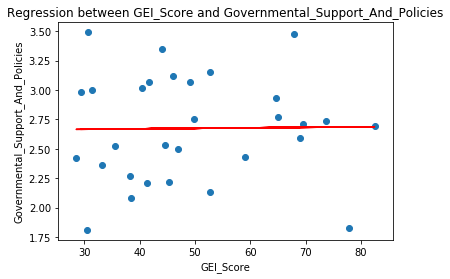

In [45]:
Regressionline('GEI_Score','Governmental_Support_And_Policies')

Text(0.5,1,'Governmental Support and Policies')

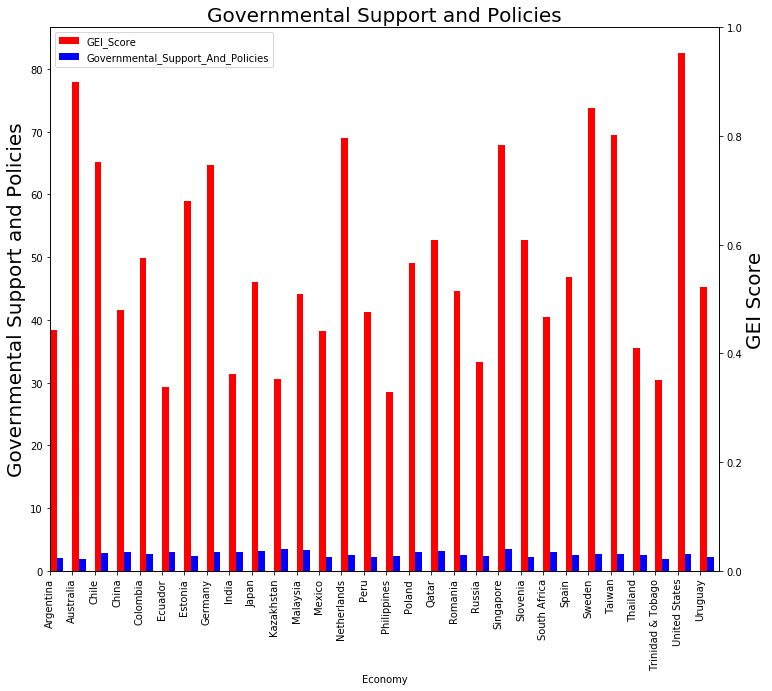

In [46]:
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() 
df_join.GEI_Score.plot(kind='bar',color='red',ax=ax,width=0.3,legend=True, position=0,figsize=((12,10)))
df_join.Governmental_Support_And_Policies.plot(kind='bar',color='blue',ax=ax,width=0.3,legend=True, position=-1)
ax2.set_ylabel('GEI Score',fontsize=20)
ax.set_ylabel('Governmental Support and Policies',fontsize=20)
plt.title('Governmental Support and Policies', fontsize=20)

The below results are also unexpected. We expected Taxes and Bureaucracy to be negatively associated with GEI Score. However, the reason for this might be a proxy for good governance, rule of law, and a predictable legal framework within which entrepreneurs can operate.

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


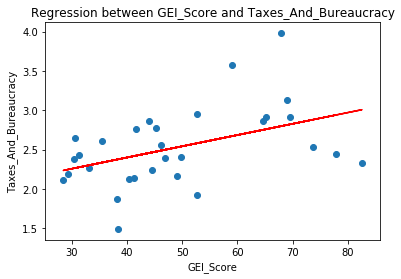

In [47]:
Regressionline('GEI_Score','Taxes_And_Bureaucracy')

Text(0.5,1,'Taxes And Bureaucracy')

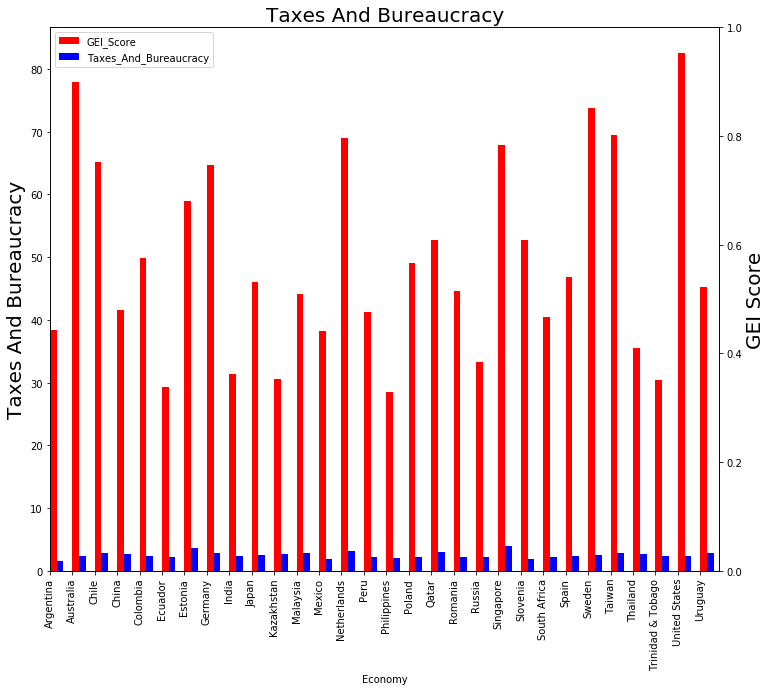

In [48]:
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() 
df_join.GEI_Score.plot(kind='bar',color='red',ax=ax,width=0.3,legend=True, position=0,figsize=((12,10)))
df_join.Taxes_And_Bureaucracy.plot(kind='bar',color='blue',ax=ax,width=0.3,legend=True, position=-1)
ax2.set_ylabel('GEI Score',fontsize=20)
ax.set_ylabel('Taxes And Bureaucracy',fontsize=20)
plt.title('Taxes And Bureaucracy', fontsize=20)

Below left, we can see an apparent (and likely practically significant) relationship between GEI Score and Governmental Programs. This was expected.

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


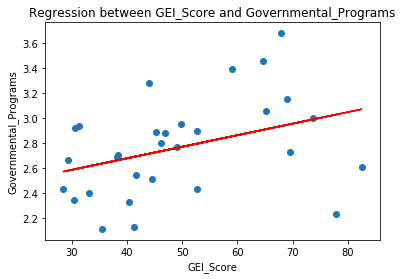

In [49]:
Regressionline('GEI_Score','Governmental_Programs')

Text(0.5,1,'Governmental Programs')

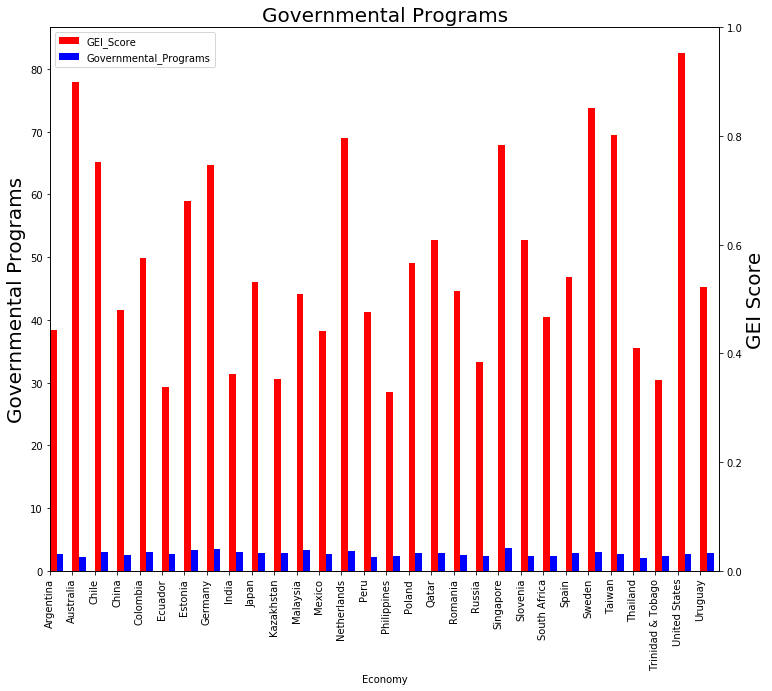

In [50]:
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() 
df_join.GEI_Score.plot(kind='bar',color='red',ax=ax,width=0.3,legend=True, position=0,figsize=((12,10)))
df_join.Governmental_Programs.plot(kind='bar',color='blue',ax=ax,width=0.3,legend=True, position=-1)
ax2.set_ylabel('GEI Score',fontsize=20)
ax.set_ylabel('Governmental Programs',fontsize=20)
plt.title('Governmental Programs', fontsize=20)

Also, as expected, below we see that Cultural and Social Norms appear to have a positive (and likely practically significant) relationship with GEI scores.

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


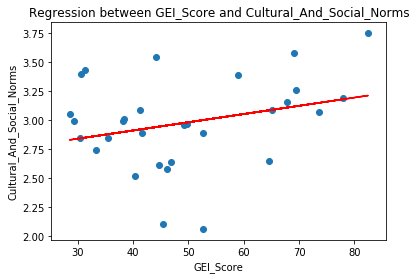

In [51]:
Regressionline('GEI_Score','Cultural_And_Social_Norms')

Text(0.5,1,'Cultural and Social Norms')

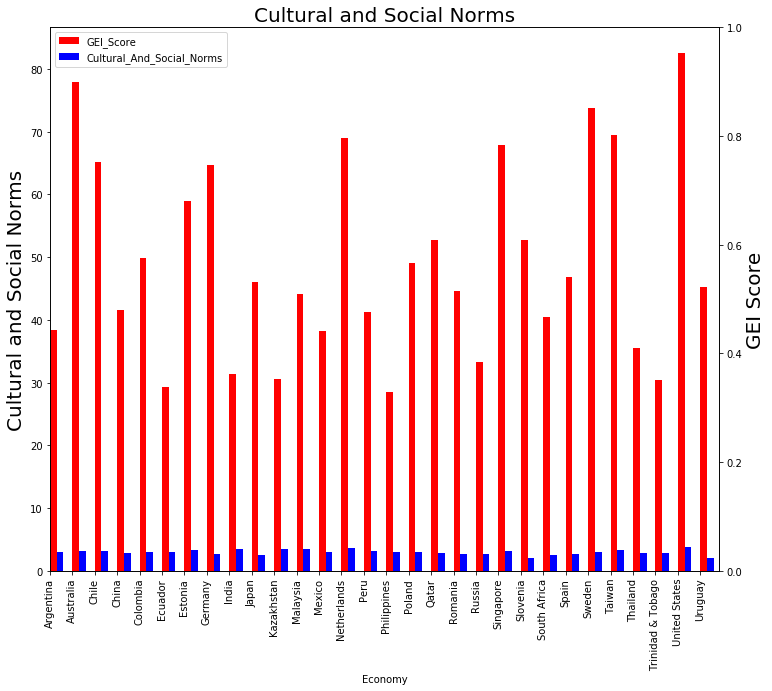

In [52]:
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() 
df_join.GEI_Score.plot(kind='bar',color='red',ax=ax,width=0.3,legend=True, position=0,figsize=((12,10)))
df_join.Cultural_And_Social_Norms.plot(kind='bar',color='blue',ax=ax,width=0.3,legend=True, position=-1)
ax2.set_ylabel('GEI Score',fontsize=20)
ax.set_ylabel('Cultural and Social Norms',fontsize=20)
plt.title('Cultural and Social Norms', fontsize=20)

Below we see only a slight positive relationship between Importance of Luck and GEI Score. However, it might not be practically significant. From the scatterplot below, it is difficult to tell.

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


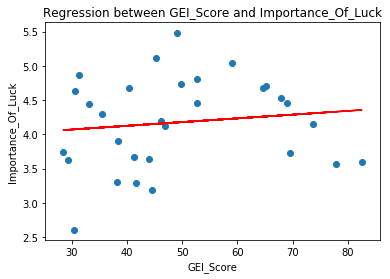

In [53]:
Regressionline('GEI_Score','Importance_Of_Luck')


Text(0.5,1,'Importance of Luck')

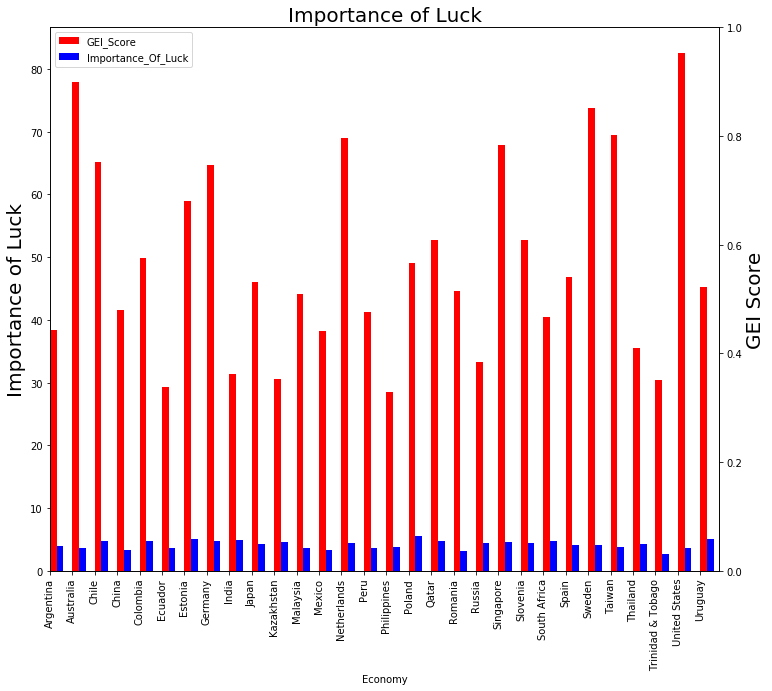

In [54]:
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() 
df_join.GEI_Score.plot(kind='bar',color='red',ax=ax,width=0.3,legend=True, position=0,figsize=((12,10)))
df_join.Importance_Of_Luck.plot(kind='bar',color='blue',ax=ax,width=0.3,legend=True, position=-1)
ax2.set_ylabel('GEI Score',fontsize=20)
ax.set_ylabel('Importance of Luck',fontsize=20)
plt.title('Importance of Luck',fontsize=20)

Finally, below we have a slightly positive relationship between Internal Locus of Control and the GEI Score. Internal Locus of Control is the degree to which people feel like they have control over outcomes in their lives. As with Importance of Luck, it might not be practically significant, but we should test this more rigorously in future iterations to be more certain.

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


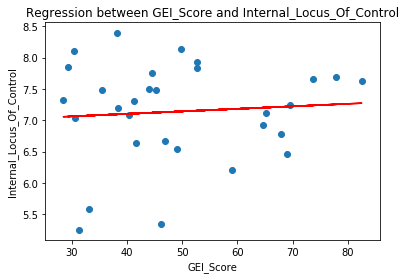

In [55]:
Regressionline('GEI_Score','Internal_Locus_Of_Control')

Text(0.5,1,'Internal Locus of Control')

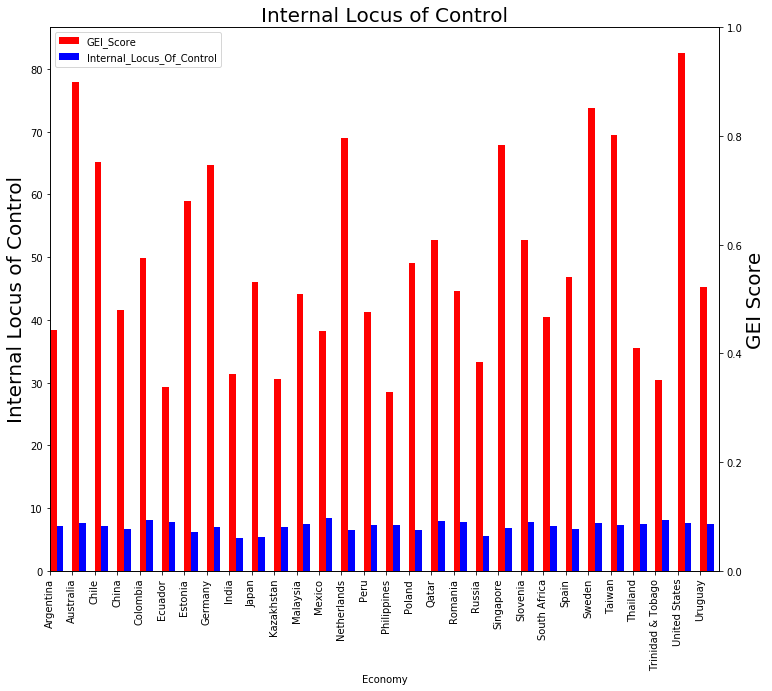

In [56]:
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() 
df_join.GEI_Score.plot(kind='bar',color='red',ax=ax,width=0.3,legend=True, position=0,figsize=((12,10)))
df_join.Internal_Locus_Of_Control.plot(kind='bar',color='blue',ax=ax,width=0.3,legend=True, position=-1)
ax2.set_ylabel('GEI Score',fontsize=20)
ax.set_ylabel('Internal Locus of Control',fontsize=20)
plt.title('Internal Locus of Control',fontsize=20)

# Results

## Model Building

A primary purpose of this EDA was to gain insights from the data to inform the building of a statistical model in future research. This section breaks down the expected and unexpected results, as well as the final variable selection for model building and more formal statistical hypothesis testing. 

Results that support our hypotheses (i.e. are positively associated with GEI scores, or, in other words, are supportive elements to an entrepreneurial economy): 
- Governmental Programs
- Cultural and Social Norms
- Importance of Luck
- Internal Locus of Control

Results that surprised us with the direction of the relationship with the GEI Score: 
- Fear of Failure Rate has a positive, not a negative relationship.
- Entrepreneurship as a Desirable Career Choice has a negative, not a positive relationship. 
- Media Attention for Entrepreneurship has a negative, not a positive relationship.
- Taxes and Bureaucracy has a positive, not a negative relationship.

Results that surprised us with no likely practically significant relationship with the GEI Score:
- High Status Successful Entrepreneurship 
- Government Support and Policies

Variables to be included in a future model for further regression analysis and hypothesis testing:
- Policy and Governance: 
    - Taxes and Bureaucracy
    - Governmental Programs
- Culture and Attitudes: 
    - Fear of Failure Rate
    - Entrepreneurship as a Desirable Career Choice
    - Media Attention for Entrepreneurship
    - Cultural and Social Norms
    - Importance of Luck
    - Internal Locus of Control

Variables to not include in a future model:
- High Status Successful Entrepreneurship 
- Government Support and Policies

## Additional DIrections and Limitations

To make the data set we used more robust, we plan to add additional years of data to the current data set. It would be helpful to use a time series analysis to show trends over time. The longest running data set is the WVS, going back to 1981. The GEM data goes back to 1999, and while the GEI does not go back as far, one of the authors has GEI index data from 2010. A time series analysis covering data going back to 2010 might not have conclusive results, but it could be worth examining. 

Finally, this data is limited to 30 countries. Most of these are developed, and the ones that are developing are experiencing relatively low levels of conflict. This is a key limitation with survey data--researchers have to actually be able to contact the subjects of interest. In high conflict and/or dangerous places, this might not be feasible. Because of this, even if we do find statistically significant relationships in future research, we would hesitate to make any inferences about countries not included in this study. 

# References 

http://thegedi.org/global-entrepreneurship-and-development-index/

http://www.gemconsortium.org

http://www.worldvaluessurvey.org